# Exercise 1-1: Tensor Renormalization Group for 2d Ising model
2020, July, Tsuyoshi Okubo  
2021, July, Tsuyoshi Okubo  
2023, March, Tsuyoshi Okubo

This code simulate 2d Ising model on the square lattice, whose Hamiltonian is given by
 $$ \mathcal{H} = -J \sum_{\langle i,j\rangle} S_i S_j$$
where $S_i = \pm 1$. 

We will calculate the free energy density, $f$, of the system based on Tensor Renormalization Group (TRG) proposed in M. Levin and C. P. Nave, PRL **99** 120601 (2007).

Then by using numerical differentiation, we will caluculate 
* energy density: $E = f - T \frac{d f}{d T}$
* specific heat: $C = \frac{d E}{d T} = -T\frac{d^2 f}{d T^2}$

The calculated observables will be compared with the exact values calculated by the code distributed at
https://github.com/todo-group/exact
developped by Prof. Synge Todo. 

(Notice that energy and specific heat are approximatedly calculated by numerical differentiation of the exact free energy, as like the case of TRG.)

#### Parameters for TRG simulations
* n: size of the system which corresponds to $L = 2^n$ for $L\times L$ square lattice.
* D: Bond dimension. It is used as maximum value to keep at the low rank apporximation based on SVD. 

In [1]:
import numpy as np
try:
    import TRG_lib
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/TRG_lib.py
    import TRG_lib

import os
import pickle

%matplotlib inline
from matplotlib import pyplot

In [2]:
Tc = 2.0/np.log(1.0+np.sqrt(2.0)) ## The critical temperature of the Ising model 

### input parameters ###
n = 7 ## L = 2^n
T_min = 2.0
T_max = 2.7
T_step = 0.01

T_list=np.arange(T_min,T_max,T_step)

D = 4 ## bond dimension

### input parameters ###

L = 2**n
TRG_step = 2*n -1

data_file = "trgdata_ex1-1_D"+repr(D)+"_L"+repr(L)+".dat" ## Simulation data will be seved to this file.


In [3]:
def Calculate_EC(T,f):
    T_num = len(T)
    E = np.empty(T_num-2)
    C = np.empty(T_num-2)
    T_cut = np.empty(T_num-2)
    for i in range(0,T_num-2):
        E[i] = f[i+1]-T[i+1] * (f[i+2]-f[i])/(T[i+2]-T[i])
        C[i] = -T[i+1] * (f[i+2]+f[i]-2.0*f[i+1])/(T[i+2]-T[i+1])**2
        T_cut[i] = T[i+1]
    return T_cut,E,C



In [4]:
def read_free_energy(file_name):
    T = []
    f = []
    for line in open(file_name, "r"):
        data = line.split()
        if data[0] =="#":
            header = line
            continue
        T.append(float(data[4]))
        f.append(float(data[6]))
    return T,f


In [5]:
%%time
## TRG simulation
free_energy_density = []
for T in T_list:
    free_energy_density.append(TRG_lib.TRG_Square_Ising(T,D,TRG_step,Energy_flag=False))


T, free_energy_density = 2.0 -2.051135945213585
T, free_energy_density = 2.01 -2.0526555969730143
T, free_energy_density = 2.0199999999999996 -2.054211060194283
T, free_energy_density = 2.0299999999999994 -2.05580313544757
T, free_energy_density = 2.039999999999999 -2.0574326609027627
T, free_energy_density = 2.049999999999999 -2.0591005167048917
T, free_energy_density = 2.0599999999999987 -2.0608076301385374
T, free_energy_density = 2.0699999999999985 -2.0625549817794786
T, free_energy_density = 2.0799999999999983 -2.06434361289751
T, free_energy_density = 2.089999999999998 -2.0661746344681564
T, free_energy_density = 2.099999999999998 -2.0680492382872004
T, free_energy_density = 2.1099999999999977 -2.0699687108854388
T, free_energy_density = 2.1199999999999974 -2.071934451253208
T, free_energy_density = 2.1299999999999972 -2.073947993879663
T, free_energy_density = 2.139999999999997 -2.0760110394288214
T, free_energy_density = 2.149999999999997 -2.0781254967862828
T, free_energy_dens

In [6]:
filename_exact = "exact_output/free_energy_exact_L"+repr(L)+".dat"
if not os.path.exists(filename_exact):
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/{filename_exact} -P exact_output

T_e,f_e = read_free_energy(filename_exact)


In [7]:
 ## Caluculate Energy and Specific heat by numerical differentiation
T_cut, E, C = Calculate_EC(T_list, free_energy_density)
T_cut_e, E_e, C_e = Calculate_EC(T_e, f_e)

## save data
f = open(data_file,"wb")
obs_list = [free_energy_density, E, C, T_list]
pickle.dump(obs_list,f)
f.close

<function BufferedWriter.close>

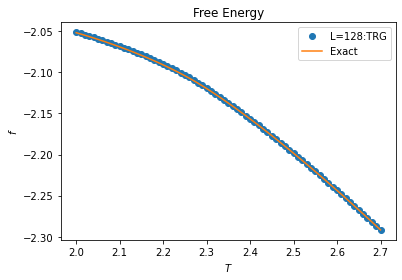

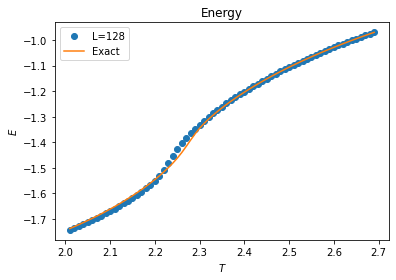

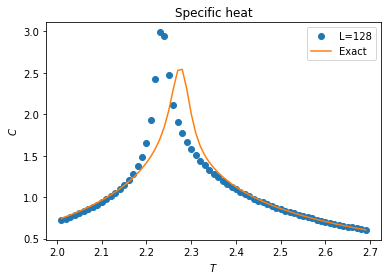

In [8]:
## plot observables
pyplot.figure()
pyplot.title("Free Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$f$")
pyplot.plot(T_list,free_energy_density,"o",label = "L="+repr(L)+":TRG")
pyplot.plot(T_e,f_e,"-",label = "Exact")
pyplot.legend()

pyplot.figure()
pyplot.title("Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$E$")
pyplot.plot(T_cut,E,"o",label = "L="+repr(L))
pyplot.plot(T_cut_e,E_e,"-",label = "Exact")
pyplot.legend()

pyplot.figure()
pyplot.title("Specific heat")
pyplot.xlabel("$T$")
pyplot.ylabel("$C$")
pyplot.plot(T_cut,C,"o",label = "L="+repr(L))
pyplot.plot(T_cut_e,C_e,"-",label = "Exact")
pyplot.legend()